In [1]:
import pandas as pd
import math
data = pd.read_csv("DT.csv")

In [3]:
inputs = data.drop('price',axis='columns')
target = data['price']


Accuracy: 0.9777777777777777
Confusion matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


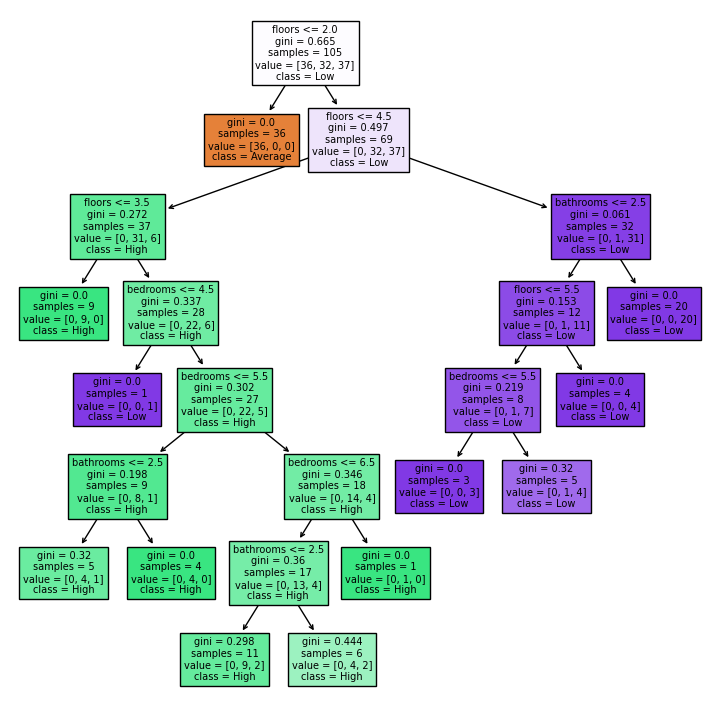

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=1)

# Train decision tree model with information gain as split criterion
dt1 = DecisionTreeClassifier(criterion='gini',ccp_alpha=0)
dt1.fit(X_train, y_train)

dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt2.fit(X_train, y_train)

# Create the third decision tree
dt3 = DecisionTreeClassifier(criterion="entropy",ccp_alpha=0.02)
dt3.fit(X_train, y_train)

# Predict on test set

y_pred_dt1 = dt1.predict(X_test)

# Predict the target variable for the test data using the second decision tree
y_pred_dt2 = dt2.predict(X_test)

# Predict the target variable for the test data using the third decision tree
y_pred_dt3 = dt3.predict(X_test)

# Evaluate model performance
accuracy = metrics.accuracy_score(y_test, y_pred_dt1)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt1)

print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion_matrix)



# Plot decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(9, 9))
plot_tree(dt1, filled=True, feature_names=inputs.columns, class_names=target.unique().astype(str), ax=ax)
plt.show()


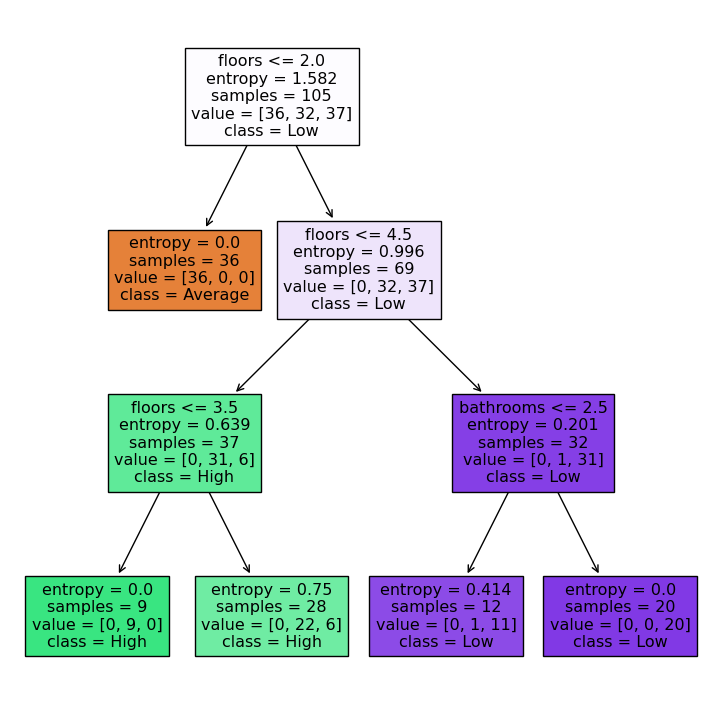

Accuracy: 0.9777777777777777
Confusion matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [5]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_tree(dt2, filled=True, feature_names=inputs.columns, class_names=target.unique().astype(str), ax=ax)
plt.show()

accuracy2 = metrics.accuracy_score(y_test, y_pred_dt2)
confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred_dt2)

print("Accuracy:", accuracy2)
print("Confusion matrix:\n", confusion_matrix2)



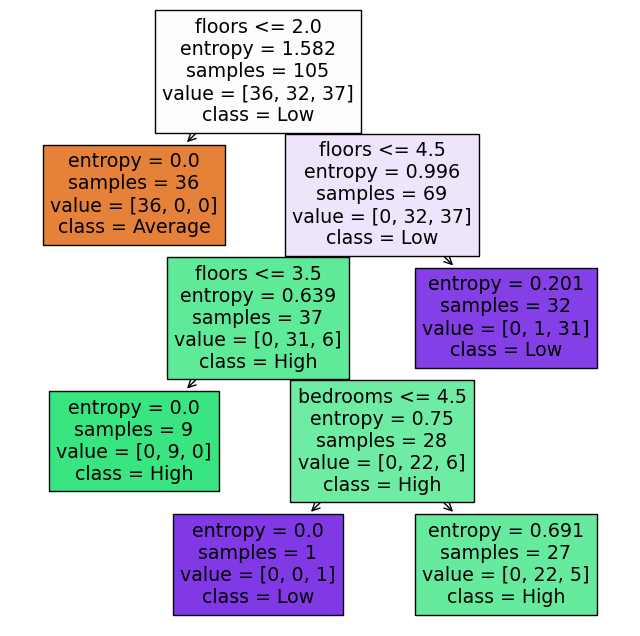

Accuracy: 0.9777777777777777
Confusion matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_tree(dt3, filled=True, feature_names=inputs.columns, class_names=target.unique().astype(str), ax=ax)
plt.show()
accuracy3 = metrics.accuracy_score(y_test, y_pred_dt3)
confusion_matrix3 = metrics.confusion_matrix(y_test, y_pred_dt3)

print("Accuracy:", accuracy3)
print("Confusion matrix:\n", confusion_matrix3)



Accuracy: 0.9777777777777777
Confusion matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


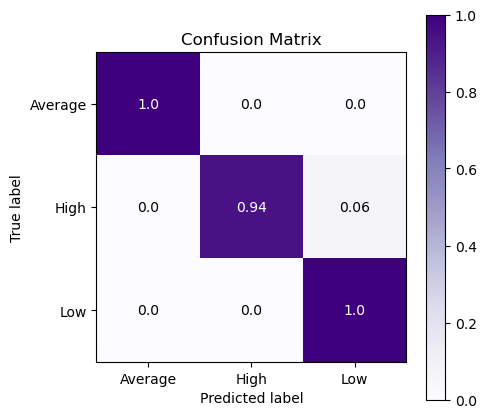

In [7]:
accuracy = metrics.accuracy_score(y_test, y_pred_dt1)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt1)

print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion_matrix)

import scikitplot as skplt

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt1,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax
                                    );